Nama = Antonius Heri Natanael
NIM = 4222201059
Kelas = Robotika Malam A
Mata Kuliah = Computer Vision(RE604)

*menggunakan file emnist-balanced-test.csv dan emnist-balanced-train.csv untuk melakukan klasifikasi tulisan tangan menggunakan menggunakan HOG Feature Extraction dengan klasifier Support Vector Machine (SVM).*

1. Load dataset dari CSV

In [1]:
import pandas as pd

In [3]:
Train_Data = pd.read_csv('emnist-balanced-train.csv', nrows=3000)
Test_Data = pd.read_csv('emnist-balanced-test.csv', nrows=3000)
print("train data shape:", Train_Data.shape)
print("test data shape:", Test_Data.shape)

train data shape: (3000, 785)
test data shape: (3000, 785)


2. Fitur & Label

In [4]:
X_train = Train_Data.iloc[:, 1:].values
Y_train = Train_Data.iloc[:, 0].values
X_test = Test_Data.iloc[:, 1:].values
Y_test = Test_Data.iloc[:, 0].values

print("shape X_train: ", X_train.shape)
print("shape Y_train: ", Y_train.shape)

shape X_train:  (3000, 784)
shape Y_train:  (3000,)


In [5]:
print("X_test shape sebelum reshape:", X_test.shape)


X_test shape sebelum reshape: (3000, 784)


3. Reshape Data

In [6]:
X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)
print("reshape X_train:", X_train.shape)
print("reshape X_test:", X_test.shape)

reshape X_train: (3000, 28, 28)
reshape X_test: (3000, 28, 28)


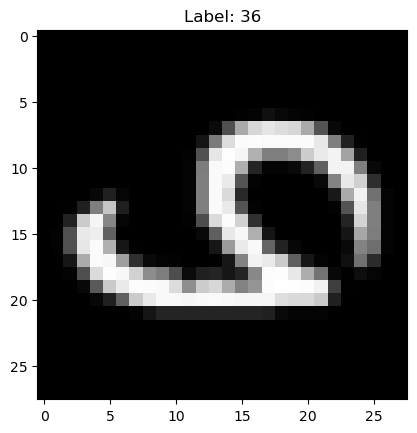

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[55], cmap='gray')
plt.title(f'Label: {Y_train[55]}')
plt.show()

4. Fitur HOG

In [8]:
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler

def extract_hog_features(images):
    hog_features = []
    for image in images:
        hog_feat = hog(image, orientations = 9, pixels_per_cell =(8,8), cells_per_block=(2,2), block_norm='L2')
        hog_features.append(hog_feat)
    return hog_features

X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

#standarisasi ftur hog

scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_test_hog = scaler.transform(X_test_hog)

print("shape of HOG feature (X_train):", len(X_train_hog[0]))

shape of HOG feature (X_train): 144


5. Membangun dan melatih model SVM

In [9]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_hog, Y_train)

Y_pred = svm_model.predict(X_test_hog)

6. Evaluasi model

In [10]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC

def extract_hog_feature(images):
    hog_features=[]
    for img in images:
        features= hog(img.reshape(28,28), orientations = 9, pixels_per_cell =(8,8), cells_per_block=(2,2), block_norm='L2',visualize=False)
        hog_features.append(features)
    return np.array(hog_features)

X_train_hog = extract_hog_feature(X_train)

loo = LeaveOneOut()

Y_true = []
Y_pred = []


#loop untuk setiap split LOOCV
for train_index, test_index in loo.split(X_train_hog):
    X_train_loo, X_test_loo = X_train_hog[train_index], X_train_hog[test_index]
    Y_train_loo, Y_test_loo = Y_train[train_index], Y_train[test_index]
    
    #melatih model
    model=SVC(kernel='linear')
    model.fit(X_train_loo, Y_train_loo)

    #Melakukan prediksi
    Y_pred_loo = model.predict(X_test_loo)
    
    #menyimpan hasil prediksi
    Y_true.append(Y_test_loo[0])
    Y_pred.append(Y_pred_loo[0])

# metrik evaluasi

accuracy = accuracy_score(Y_true, Y_pred)
conf_matrix = confusion_matrix(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

# tampilkan hasil
print("accuracy:",accuracy)
print("confusion matrix:\n",conf_matrix)
print("precision:", precision)
print("F1 score:",f1)


accuracy: 0.7066666666666667
confusion matrix:
 [[37  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 50 ...  0  0  0]
 ...
 [ 0  1  1 ...  9  1  1]
 [ 0  0  0 ...  0 56  2]
 [ 0  0  0 ...  0  0 47]]
precision: 0.7092580725160319
F1 score: 0.7040295713159007


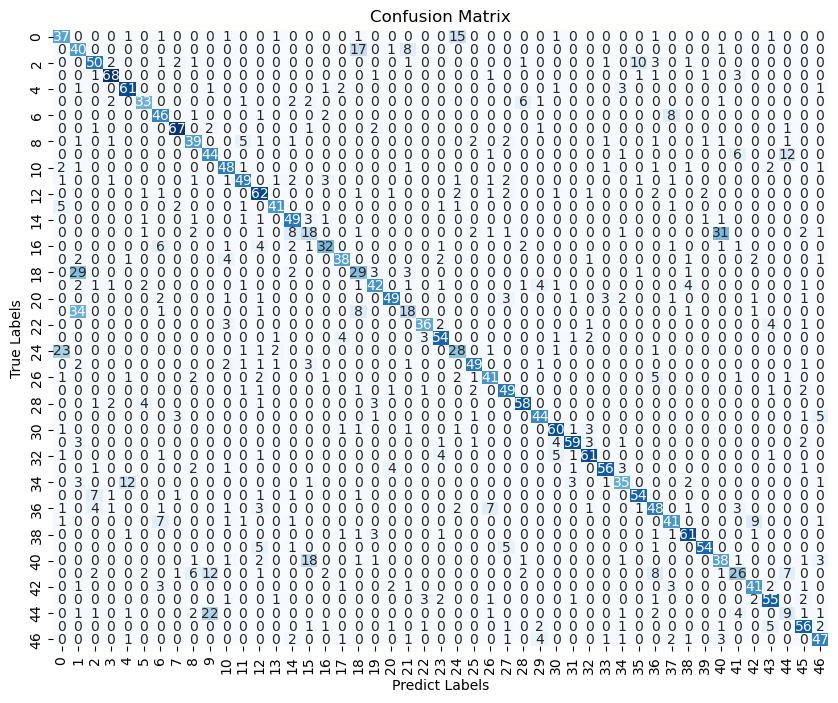

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

#hitung confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred)

#membuat plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predict Labels")
plt.ylabel("True Labels")
plt.show()